In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# Definición de la ecuación
def An(T, A, B, C, D, E, F, G):
    return A + (B / (T + C)) + (D*T) + (E * np.log(T)) + (F * (T**G))

especie1 = '2-PE'
especie2 = '1,2-PP'

# Datos de (presión en kPa y temperatura en K) tabla 3 del articulo
datos = {
    'T1': np.array([362.80, 369.85, 376.59, 380.32, 384.40, 388.37, 391.21, 394.47, 396.92, 399.26, 402.22, 405.08, 408.97, 414.71, 422.51, 432.38, 445.60, 459.29, 469.69, 480.96, 488.05, 491.95]),
    'P1': np.array([0.77, 0.97, 1.61, 1.91, 2.21, 2.67, 3.14, 3.67, 4.21, 4.57, 5.17, 5.77, 6.89, 8.77, 11.77, 16.81, 26.67, 41.44, 56.47, 76.64, 92.10, 101.33]),
    'T2': np.array([358.15, 364.55, 371.85, 375.88, 380.04, 384.10, 390.50, 393.66, 395.19,398.14, 401.10, 404.98, 411.02, 419.01,428.99, 442.19, 456.07, 466.88, 469.69, 478.35, 485.75, 489.80]),
    'P2': np.array([0.92, 1.25, 1.73, 2.13, 2.50, 2.97, 3.43, 3.97, 4.63, 4.90, 5.42, 6.10, 7.27, 8.98, 11.87, 16.67, 26.07, 39.64, 54.60, 75.07, 91.06, 101.33]),
}

df = pd.DataFrame(datos)

# Estimación inicial de los coeficientes usando los de la tabla 2 del articulo
coeficientes_iniciales = [  58.17, -8985.10, 0, 0,-5.7034,  4.6087e-18, 6.0]
coeficientes_iniciales2 = [ 133.75, -11577.65, 0, 0, -17.5651,  1.3782e-5, 2.0]
# Ajuste de la curva a los datos para la Especie1
parametros_optimos_1, covarianza_1 = curve_fit(An, df['T1'], np.log(df['P1']), p0=coeficientes_iniciales, maxfev=10000)
A_1, B_1, C_1, D_1, E_1, F_1, G_1 = parametros_optimos_1

# Ajuste de la curva a los datos para la Especie2
parametros_optimos_2, covarianza_2 = curve_fit(An, df['T2'], np.log(df['P2']), p0=coeficientes_iniciales2, maxfev=20000)
A_2, B_2, C_2, D_2, E_2, F_2, G_2 = parametros_optimos_2

# Crear DataFrame con los resultados
resultados = pd.DataFrame({
    'Especie': [especie1, especie2],
    'A': [A_1, A_2],
    'B': [B_1, B_2],
    'C': [C_1, C_2],
    'D': [D_1, D_2],
    'E': [E_1, E_2],
    'F': [F_1, F_2],
    'G': [G_1, G_2]
})

display(resultados)
## representar datos experimentales y presion/T falta graficar la funcion tambien en un linspace para un rango de T  entre 340 y 500 

,Especie,A,B,C,D,E,F,G
0,2-PE,172.178337,-21889.580987,74.140360,-0.001585,-20.668471,-2.106893e-16,3.306347
1,"1,2-PP",798.878069,-11553.927690,-151.213816,-0.011527,-130.675626,2.391000e-04,1.993215


DataFrames por mezcla:


'2-PE (1) + 2-EP (2)'

,T_exp,x,y,g1,g2
0,477.80,0.0000,0.0000,0.000000,1.002781
1,477.80,0.0269,0.0115,0.627657,1.018651
2,479.27,0.0650,0.0316,0.684963,1.001021
3,479.77,0.0865,0.0437,0.701946,0.999239
4,480.08,0.1004,0.0531,0.728539,0.996982
5,481.66,0.1688,0.0988,0.771728,0.987535
6,483.18,0.2407,0.1609,0.845280,0.969655
7,484.93,0.3151,0.2292,0.876878,0.946267
8,485.63,0.3573,0.2754,0.911699,0.932027
9,487.09,0.4488,0.3676,0.931358,0.915700


'2-PE (1) + 1,2-PP (2)'

,T_exp,x,y,g1,g2
0,489.80,0.0000,0.0000,0.000000,0.997663
1,489.83,0.0511,0.0509,1.052585,0.997098
2,489.87,0.1116,0.1103,1.043302,0.997313
3,489.93,0.1931,0.1905,1.039726,0.997514
4,489.96,0.2635,0.2588,1.034293,0.999879
5,490.02,0.3227,0.3166,1.031525,1.000931
6,490.07,0.3747,0.3681,1.031509,1.001171
7,490.16,0.4619,0.4534,1.028222,1.004024
8,490.25,0.5247,0.5154,1.026477,1.005408
9,490.37,0.5982,0.5874,1.022871,1.009482


'1,2-PP (1) + 2-EP (2)'

,T_exp,x,y,g1,g2
0,477.80,0.0000,0.0000,0.000000,1.002781
1,478.24,0.0220,0.0108,0.665128,1.003108
2,478.40,0.0335,0.0172,0.692639,1.004434
3,479.18,0.0638,0.0349,0.722564,0.998574
4,479.93,0.0964,0.0571,0.766757,0.992071
5,480.78,0.1488,0.0929,0.789951,0.991994
6,481.87,0.2045,0.1380,0.829299,0.981873
7,482.75,0.2581,0.1857,0.863706,0.973266
8,484.29,0.3539,0.2808,0.914367,0.950609
9,485.10,0.4152,0.3391,0.921269,0.946319


'2,1-PP (1) + 2-EP (2)'

,T_exp,x,y,g1,g2
0,477.80,0.0000,0.0000,0.000000,1.002781
1,478.10,0.0134,0.0045,0.592412,1.004222
2,478.62,0.0294,0.0104,0.614274,1.001571
3,479.51,0.0633,0.0247,0.659639,1.000313
4,480.53,0.1015,0.0438,0.707491,0.996801
5,482.82,0.1838,0.0940,0.783237,0.982604
6,485.41,0.2794,0.1697,0.862004,0.957613
7,487.87,0.3813,0.2610,0.904561,0.935674
8,489.63,0.4545,0.3384,0.935467,0.911124
9,490.95,0.5182,0.4067,0.949706,0.896710


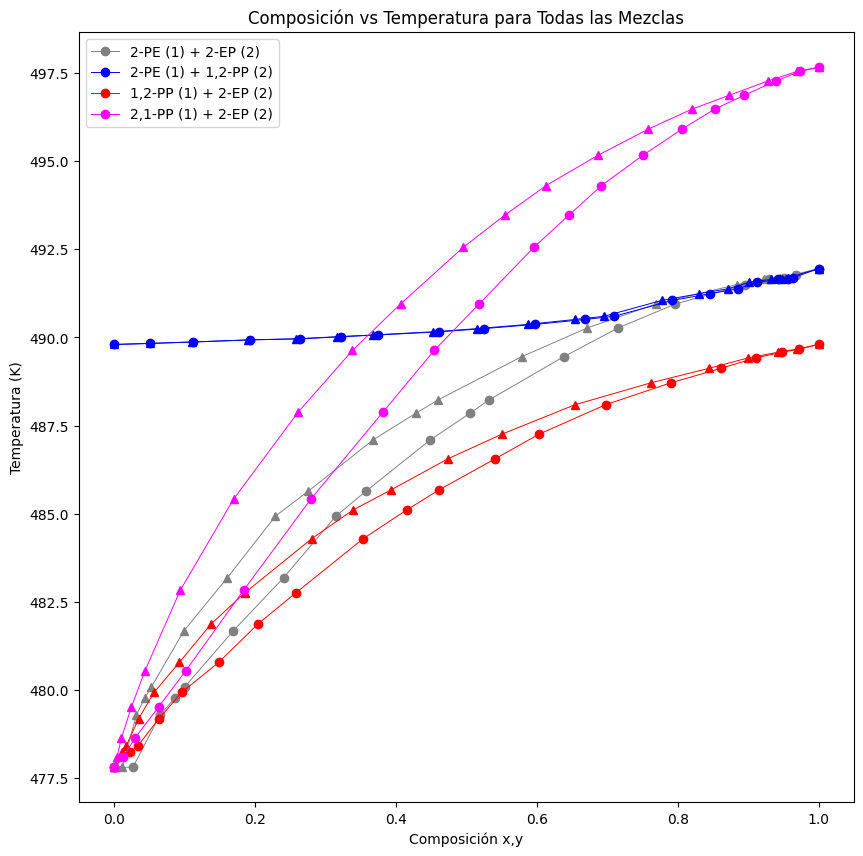

<Figure size 1920x1440 with 0 Axes>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Definir función para calcular la presión de saturación con la ecuación de Antoine:
Psat = lambda An, T: np.exp(An[0] + (An[1] / (T + An[2])) + (An[3]*T) + (An[4]* np.log(T)) + (An[5] * (T**An[-1]))) # * 1000 si lo quisieramos en Pa

# Datos experimentales:
P = 101.325  # KPa

# Parámetros de Antoine para cada componente en cada mezcla
An1 = np.array([58.17 , -8985.10 , 0, 0, -5.7034 , 4.6087e-18, 6])
An2 = np.array([154.28, -13145.00, 0, 0, -20.1810, 1.0283e-5 , 2])
An3 = np.array([133.44, -13446.00, 0, 0, -16.6590, 6.6391e-6 , 2])
An4 = np.array([133.75, -11577.65, 0, 0, -17.5651, 1.3782e-5 , 2])
# grafico
plt.figure(figsize=(10, 10))

# Datos para las cuatro mezclas:
mezclas = [
    {'nombre': '2-PE (1) + 2-EP (2)',
     'T_exp': np.array([477.80, 477.80, 479.27, 479.77, 480.08, 481.66,483.18, 484.93, 485.63, 487.09, 487.85, 488.22, 489.45, 490.27, 490.95, 491.50, 491.65,491.70 ,491.78 , 491.95]),
     'x': np.array([0,  0.0269,0.0650, 0.0865,  0.1004, 0.1688, 0.2407, 0.3151,  0.3573,  0.4488, 0.5054, 0.5317, 0.6381,  0.7156, 0.7969, 0.8958,  0.9303,0.9503, 0.9679, 1.0000]),
     'y': np.array([0, 0.0115,0.0316, 0.0437,  0.0531,  0.0988, 0.1609, 0.2292,0.2754, 0.3676, 0.4285, 0.4593, 0.5784, 0.6718, 0.7692, 0.8842, 0.9228, 0.9452 ,  0.9648, 1]),
     'Antoine_params': [An1, An2]},
   
     {'nombre': '2-PE (1) + 1,2-PP (2)',
     'T_exp': np.array([ 489.80, 489.83, 489.87, 489.93, 489.96, 490.02,490.07, 490.16, 490.25, 490.37,490.51, 490.60, 491.05, 491.24, 491.38,  491.56,  491.65, 491.65,491.70 , 491.95 ]),
     'x': np.array([0, 0.0511,  0.1116,0.1931, 0.2635, 0.3227, 0.3747,  0.4619,  0.5247,  0.5982,  0.6680,  0.7098, 0.7926,   0.8455, 0.8850, 0.9124,   0.9427,0.9566,0.9640, 1.0000]),
     'y': np.array([0,  0.0509,  0.1103,0.1905, 0.2588,  0.3166, 0.3681, 0.4534, 0.5154,0.5874, 0.6546, 0.6957,0.7773, 0.8301, 0.8710, 0.9007,  0.9330, 0.9488,  0.9573, 1]),
     'Antoine_params': [An1, An4]},

     {'nombre': '1,2-PP (1) + 2-EP (2)',
     'T_exp': np.array([477.80, 478.24,478.40, 479.18,  479.93, 480.78, 481.87, 482.75,484.29,  485.10, 485.67, 486.56, 487.25, 488.09, 488.71, 489.12, 489.42,489.58 , 489.67 , 489.80]),
      'x': np.array([0,   0.0220,0.0335, 0.0638,  0.0964, 0.1488, 0.2045,0.2581, 0.3539,  0.4152,0.4611, 0.5414, 0.6029,  0.6977,0.7901, 0.8610,  0.9109, 0.9483,  0.9728, 1.0000]),
     'y': np.array([0, 0.0108, 0.0172, 0.0349,  0.0571,   0.0929,0.1380, 0.1857,0.2808, 0.3391,0.3930, 0.4745, 0.5501, 0.6544, 0.7618, 0.8440, 0.9004,  0.9429,  0.9701, 1]),
     'Antoine_params': [An4, An2]},

     {'nombre': '2,1-PP (1) + 2-EP (2)',
     'T_exp': np.array([477.80, 478.10, 478.62, 479.51, 480.53, 482.82,485.41, 487.87, 489.63, 490.95,  492.56, 493.47, 494.31, 495.17,495.91, 496.48,496.87,497.28 ,497.55 ,  497.67]),
     'x': np.array([0,  0.0134, 0.0294,0.0633, 0.1015, 0.1838, 0.2794, 0.3813,  0.4545,0.5182, 0.5961, 0.6456,0.6919,0.7506, 0.8060,0.8525,  0.8941,0.9392, 0.9736, 1.0000]),
     'y': np.array([0, 0.0045, 0.0104, 0.0247,0.0438,  0.0940, 0.1697, 0.2610, 0.3384,  0.4067, 0.4959,0.5547, 0.6132,  0.6868,0.7581,  0.8203,  0.8727,  0.9283 ,  0.9694, 1]),
     'Antoine_params': [An3, An2]},
     
  
]

# Almacenar resultados en un DataFrame
dataframes_mezclas = {}

for mezcla in mezclas:
    nombre = mezcla['nombre']
    T_exp = mezcla['T_exp']
    x = mezcla['x']
    y = mezcla['y']
    Antoine_params = mezcla['Antoine_params']
    resultados = []

    for j in range(len(T_exp)):
        fila = {'T_exp': T_exp[j], 'x': x[j], 'y': y[j]}

        # Calcular Psat para cada componente de la mezcla
        Psat_i = [Psat(Ant_params, T=T_exp[j]) for Ant_params in Antoine_params]
        # Calcular g1 para cada componente de la mezcla
        for k, (xi, yi, Psat_k) in enumerate(zip(x[j:], y[j:], Psat_i), start=1):
            # Manejar división por cero
            g1 = 0 if xi == 0 or Psat_k == 0 else (yi * P) /( xi *Psat_k)
            fila[f'g{k}'] = g1

        # Calcular g2 con la ecuación modificada
        if (1 - x[j]) == 0 or any(Psat_k == 0 for Psat_k in Psat_i):
            g2 = 0
        else:
            g2 = ((1 - y[j]) * P )/ ((1 - x[j]) * Psat_k)
        fila['g2'] = g2

        resultados.append(fila)

    # Crear DataFrame para cada mezcla
    df_mezcla = pd.DataFrame(resultados)
    dataframes_mezclas[nombre] = df_mezcla

# Acceder a los DataFrames individuales por nombre de mezcla
colores = ['gray', 'blue', 'red', 'fuchsia']
print("DataFrames por mezcla:")
for i, (nombre, df_mezcla) in enumerate(dataframes_mezclas.items()):
    display(nombre, df_mezcla)
    plt.plot(df_mezcla['x'], df_mezcla['T_exp'], marker='o',color=colores[i], linewidth=0.7,label=f'{nombre}')
    plt.plot(df_mezcla['y'], df_mezcla['T_exp'], marker='^',color=colores[i],linewidth=0.7)
plt.title('Composición vs Temperatura para Todas las Mezclas')
plt.ylabel('Temperatura (K)')
plt.xlabel('Composición x,y')
plt.legend()
plt.figure(dpi=300)  # Ajustar la resolución de la figura
plt.show()

Comprobación de los parámetros de Antoine con las temp. de saturación de los comp. puros:
Psat. 2‑Phenylethanol: 101418 Pa
Psat.  2‑Ethylphenol: 101044 Pa
Resultado de la minimización de la OF:
   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.9116278851167446
        x: [-5.353e+02 -6.597e+02]
      nit: 3
      jac: [-1.294e-04  1.065e-04]
 hess_inv: [[ 3.524e+03  4.213e+03]
            [ 4.213e+03  5.039e+03]]
     nfev: 134
     njev: 41

Parámetros Wilson optimizados: [-535.26975941 -659.65656768]


,g1_opt,g2_opt,y1_opt
0,0.6909,1.0000,0.0000
1,0.7080,0.9997,0.0132
2,0.7314,0.9981,0.0338
3,0.7443,0.9967,0.0463
4,0.7524,0.9956,0.0548
5,0.7907,0.9882,0.1009
6,0.8275,0.9769,0.1570
7,0.8617,0.9621,0.2231
8,0.8793,0.9525,0.2639
9,0.9132,0.9290,0.3597


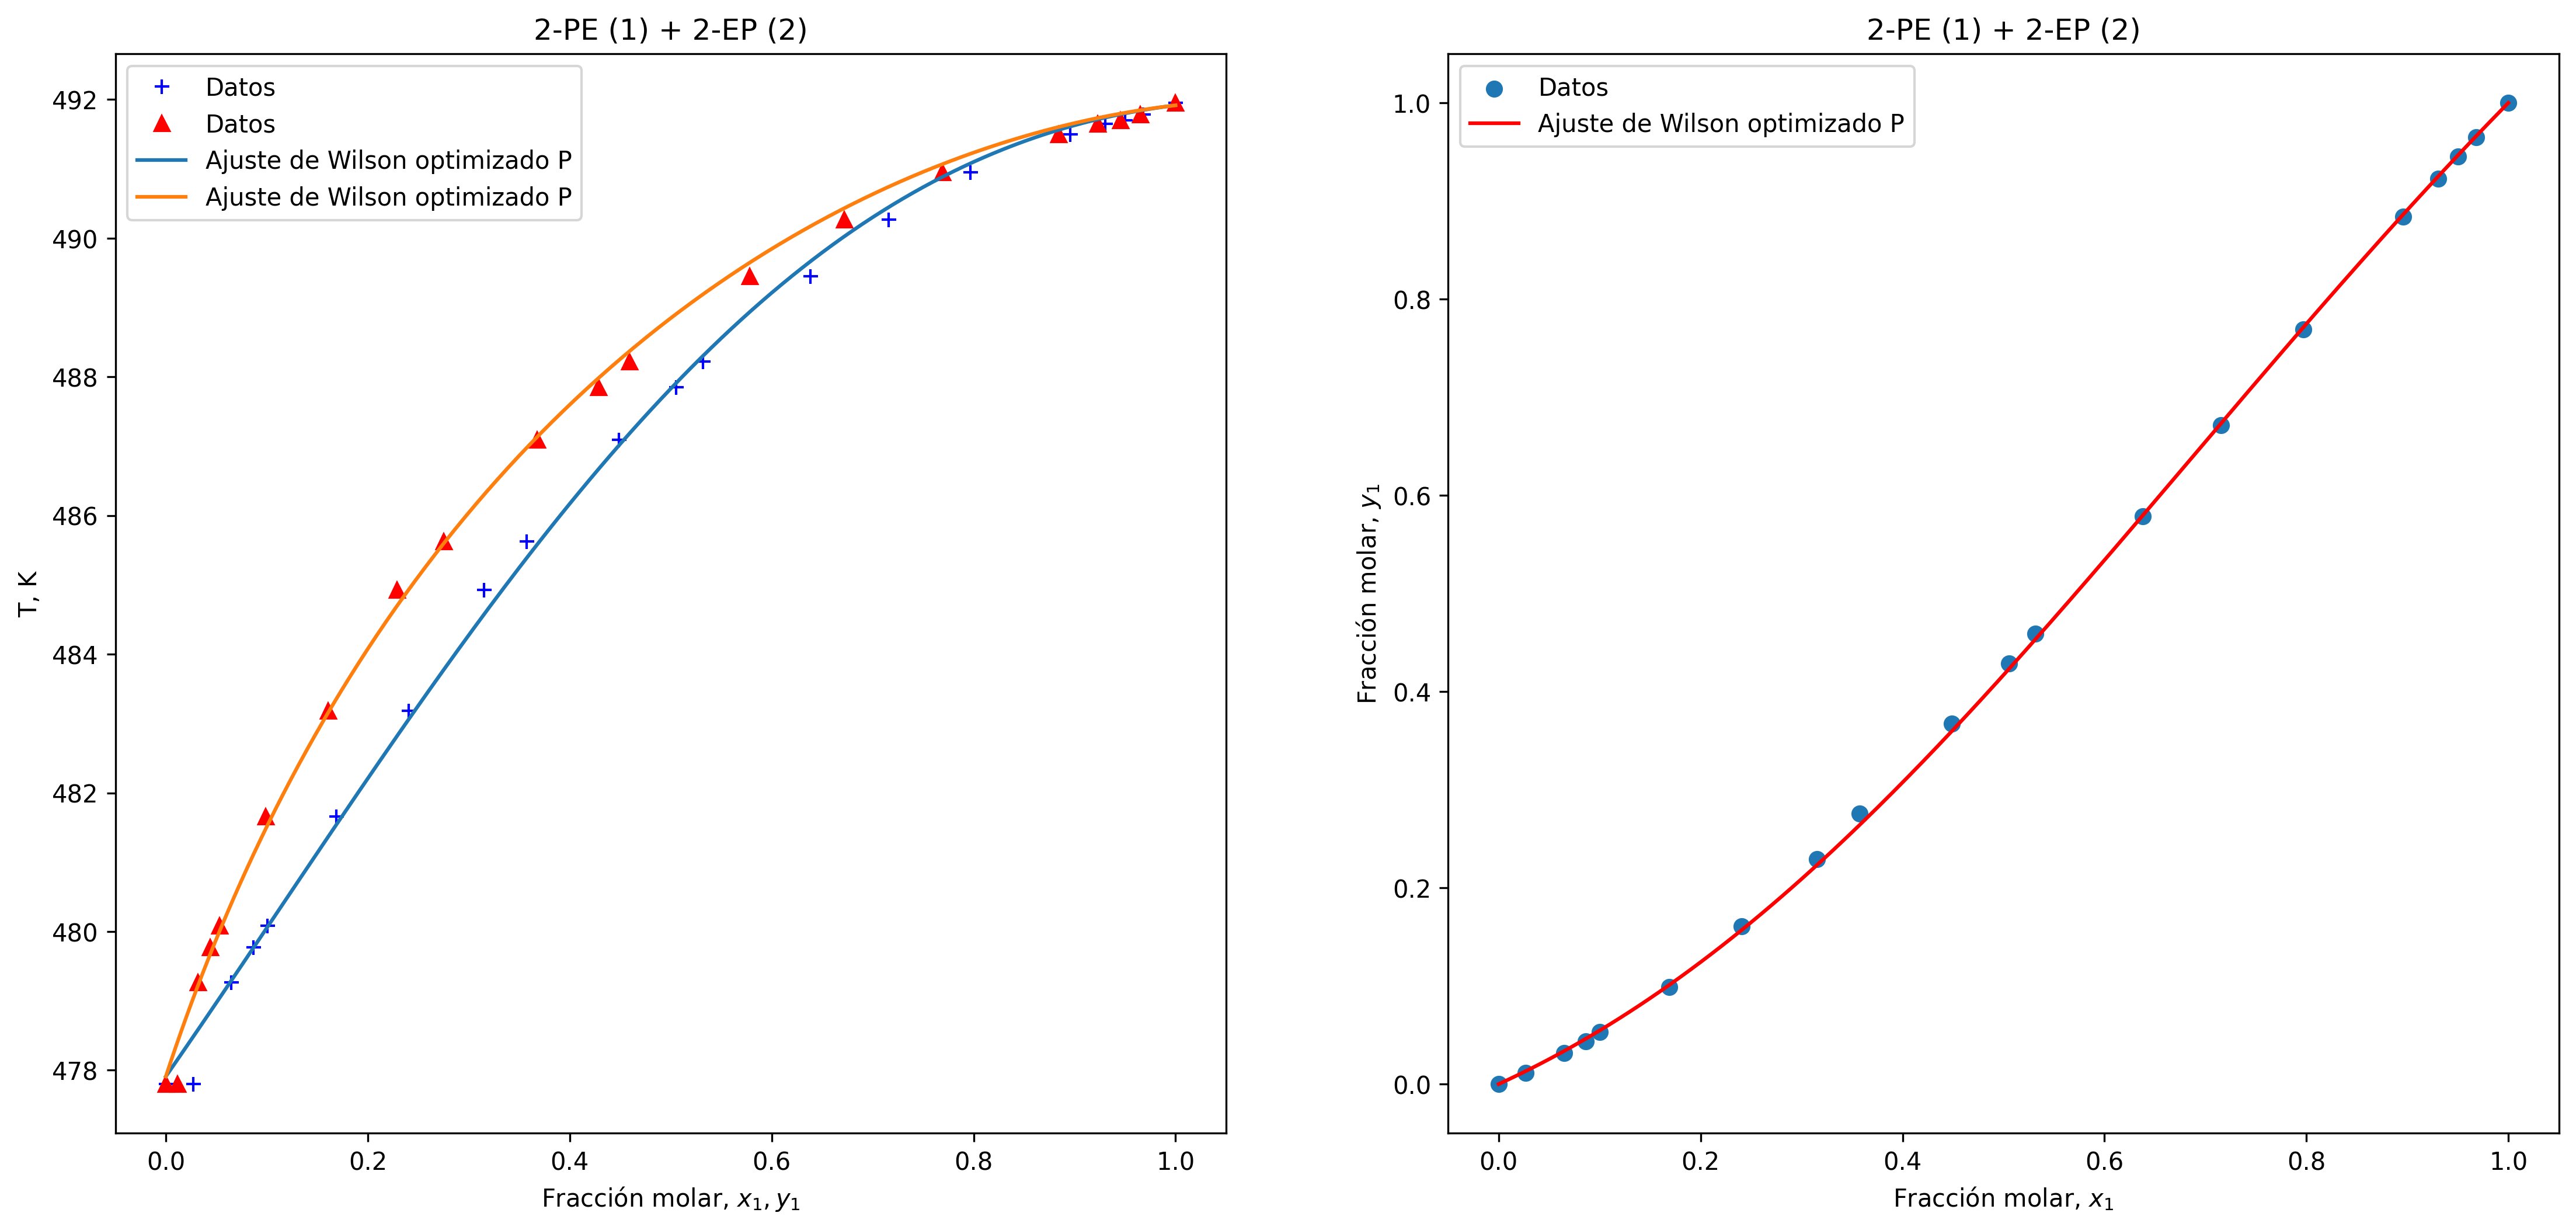

,Datos,D,J,D-J
0,Experimentales,1.536802,4.441209,-2.904408
1,Calculados,1.007656,4.395630,-2.904408


<Figure size 1920x1440 with 0 Axes>

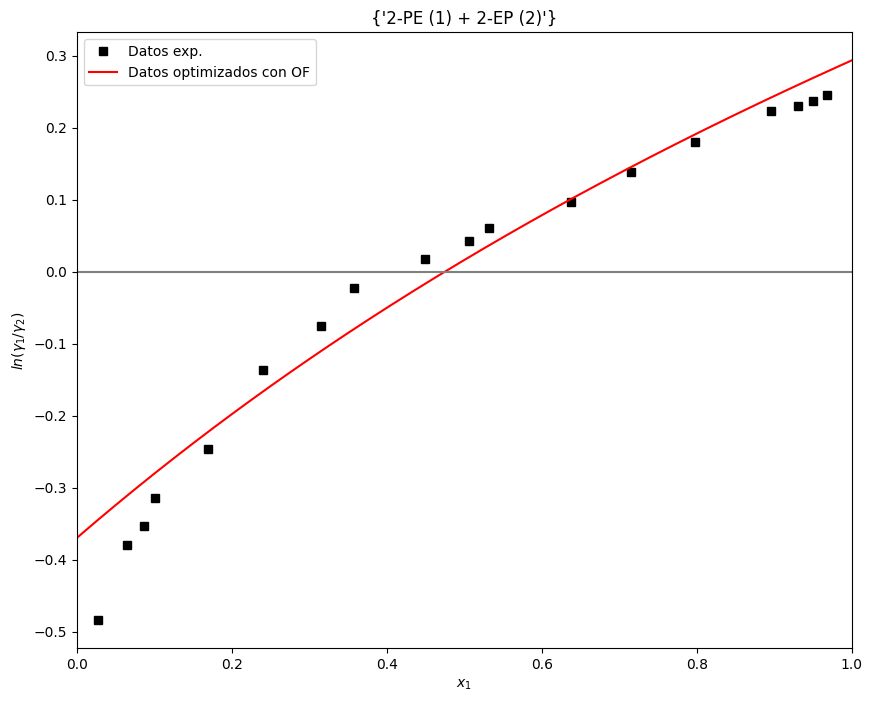

Comprobación de los parámetros de Antoine con las temp. de saturación de los comp. puros:
Psat. 2‑Phenylethanol: 101418 Pa
Psat.  1‑Phenyl-2-propanol : 101562 Pa
Resultado de la minimización de la OF:
   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.38622907975716425
        x: [ 1.370e+02  1.336e+02]
      nit: 8
      jac: [ 1.553e-06 -5.192e-05]
 hess_inv: [[ 3.334e-03  4.439e-04]
            [ 4.439e-04  5.917e-05]]
     nfev: 212
     njev: 69

Parámetros Wilson optimizados: [136.95636321 133.56909754]


,g1_opt,g2_opt,y1_opt
0,1.0597,1.0000,0.0000
1,1.0541,1.0001,0.0508
2,1.0479,1.0007,0.1104
3,1.0400,1.0020,0.1898
4,1.0337,1.0038,0.2579
5,1.0287,1.0058,0.3149
6,1.0247,1.0079,0.3650
7,1.0185,1.0123,0.4490
8,1.0146,1.0161,0.5099
9,1.0106,1.0213,0.5817


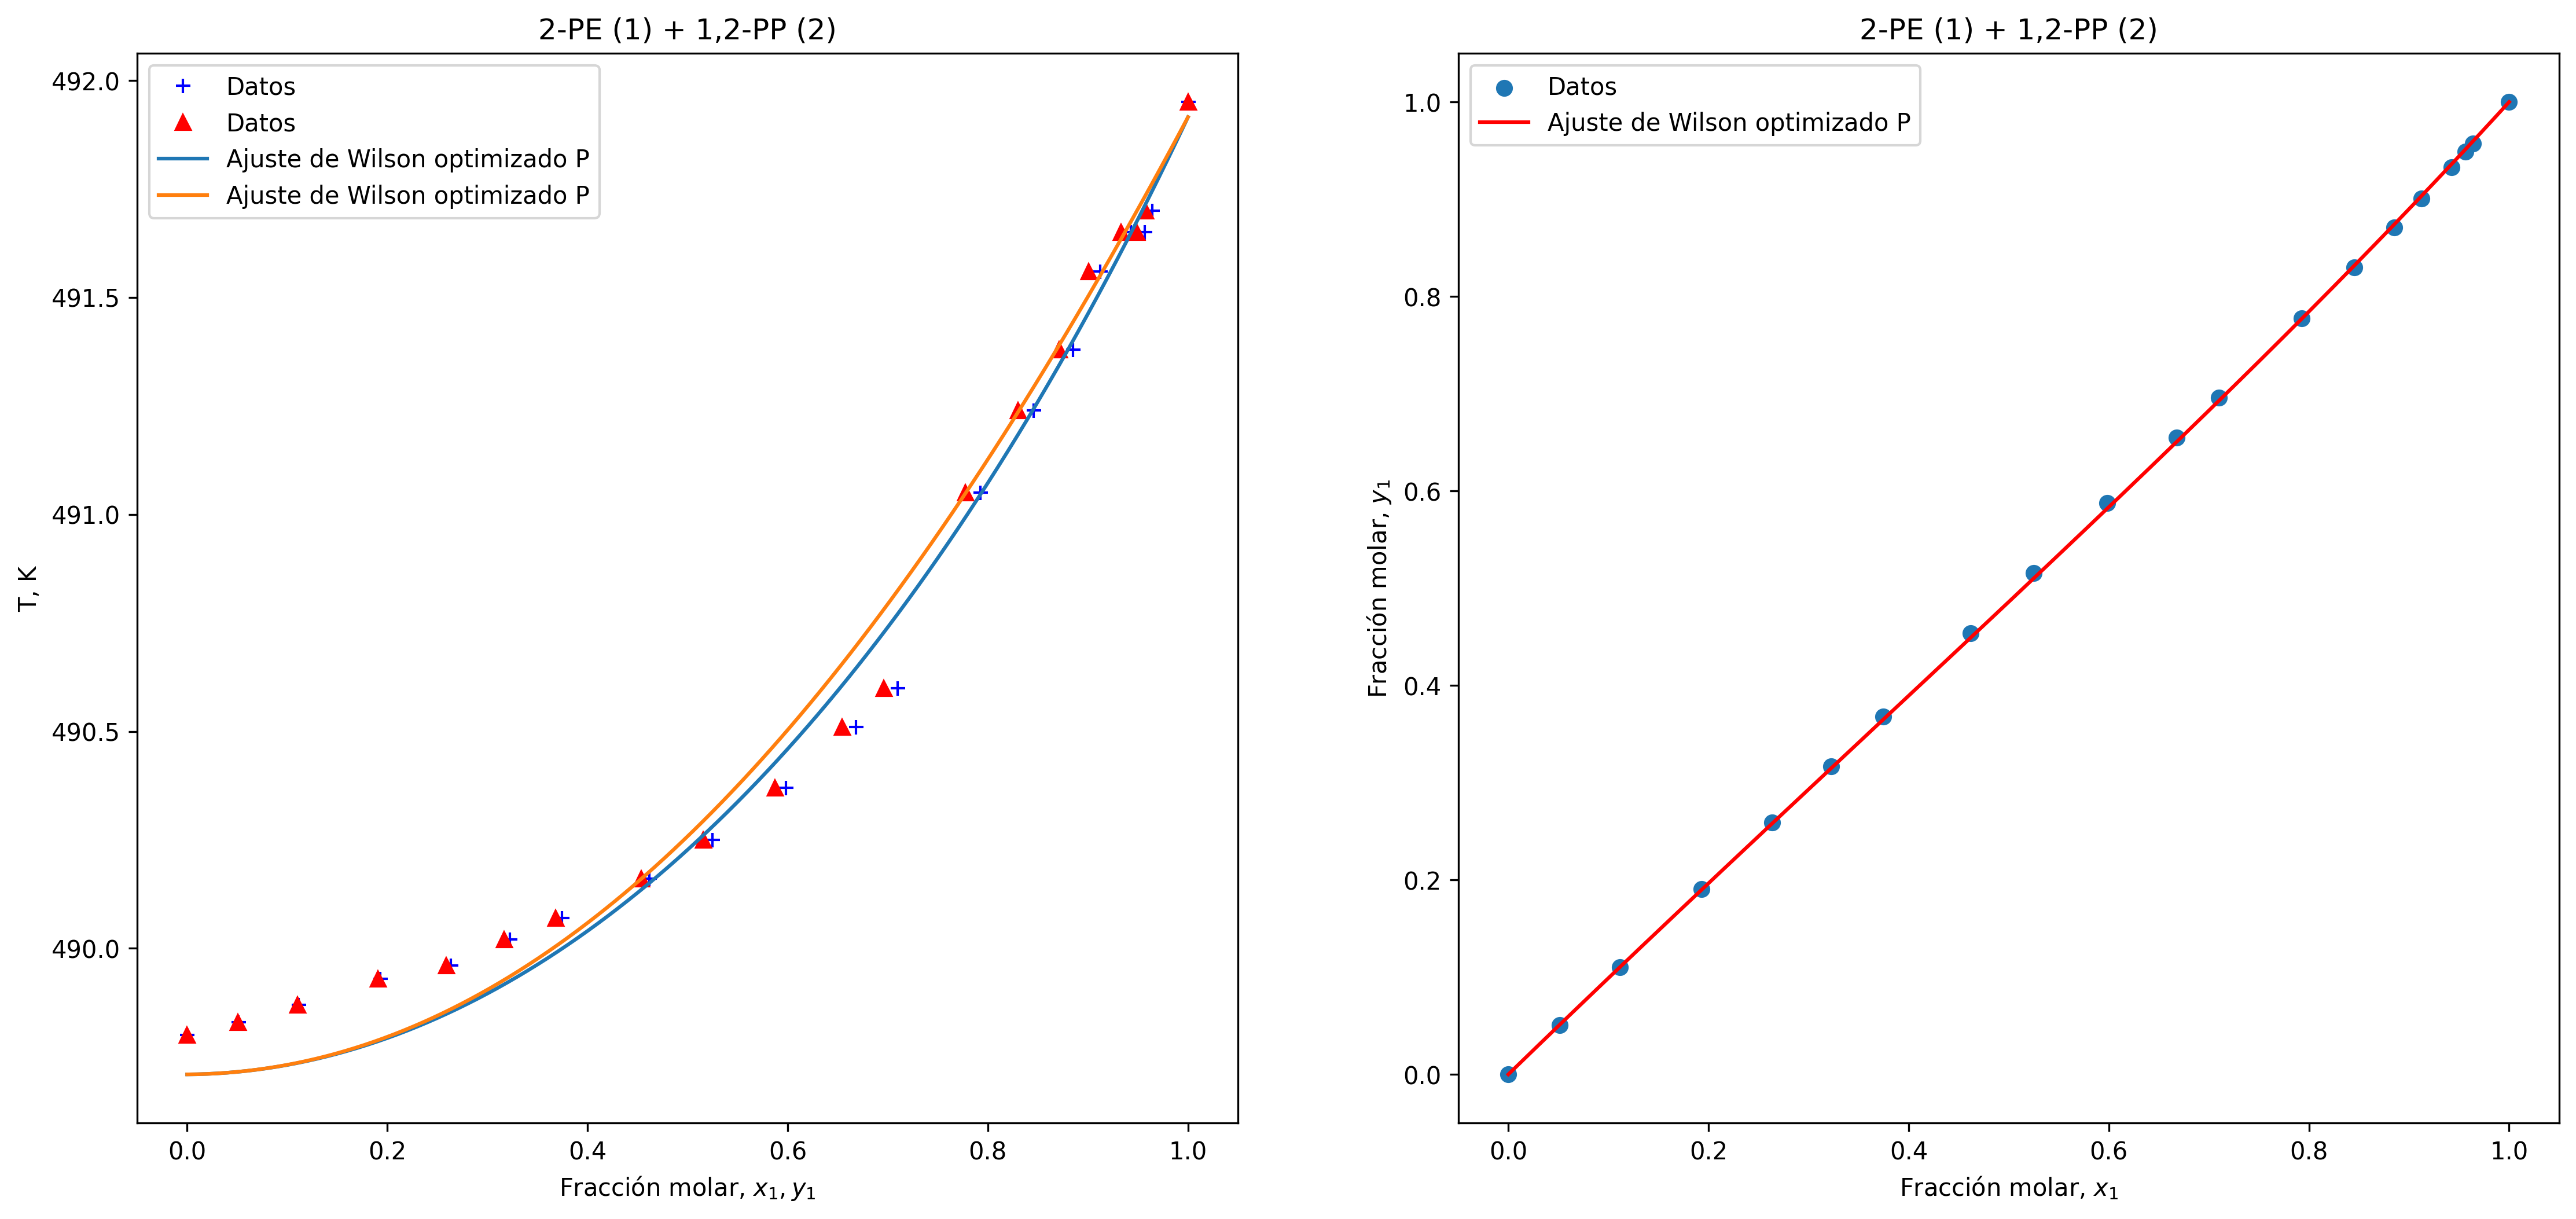

,Datos,D,J,D-J
0,Experimentales,11.067074,0.658553,10.40852
1,Calculados,0.147004,0.675554,10.40852


<Figure size 1920x1440 with 0 Axes>

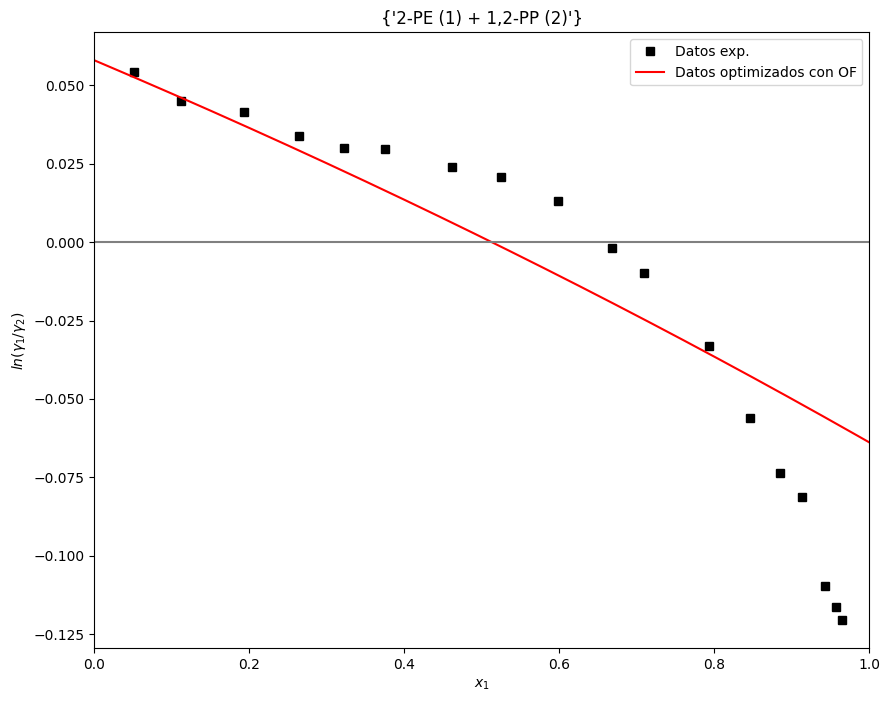

Comprobación de los parámetros de Antoine con las temp. de saturación de los comp. puros:
Psat.  1‑Phenyl-2-propanol : 101562 Pa
Psat.  2‑Ethylphenol: 101044 Pa
Resultado de la minimización de la OF:
   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.33131736092416664
        x: [ 1.764e+03 -1.777e+03]
      nit: 27
      jac: [ 3.330e-05  3.651e-05]
 hess_inv: [[ 6.202e+04 -4.928e+04]
            [-4.928e+04  3.916e+04]]
     nfev: 417
     njev: 135

Parámetros Wilson optimizados: [ 1763.98151539 -1776.55727423]


,g1_opt,g2_opt,y1_opt
0,0.7042,1.0000,0.0000
1,0.7224,0.9997,0.0118
2,0.7316,0.9994,0.0182
3,0.7547,0.9978,0.0364
4,0.7779,0.9953,0.0577
5,0.8117,0.9895,0.0954
6,0.8434,0.9816,0.1400
7,0.8700,0.9727,0.1869
8,0.9091,0.9545,0.2788
9,0.9293,0.9418,0.3421


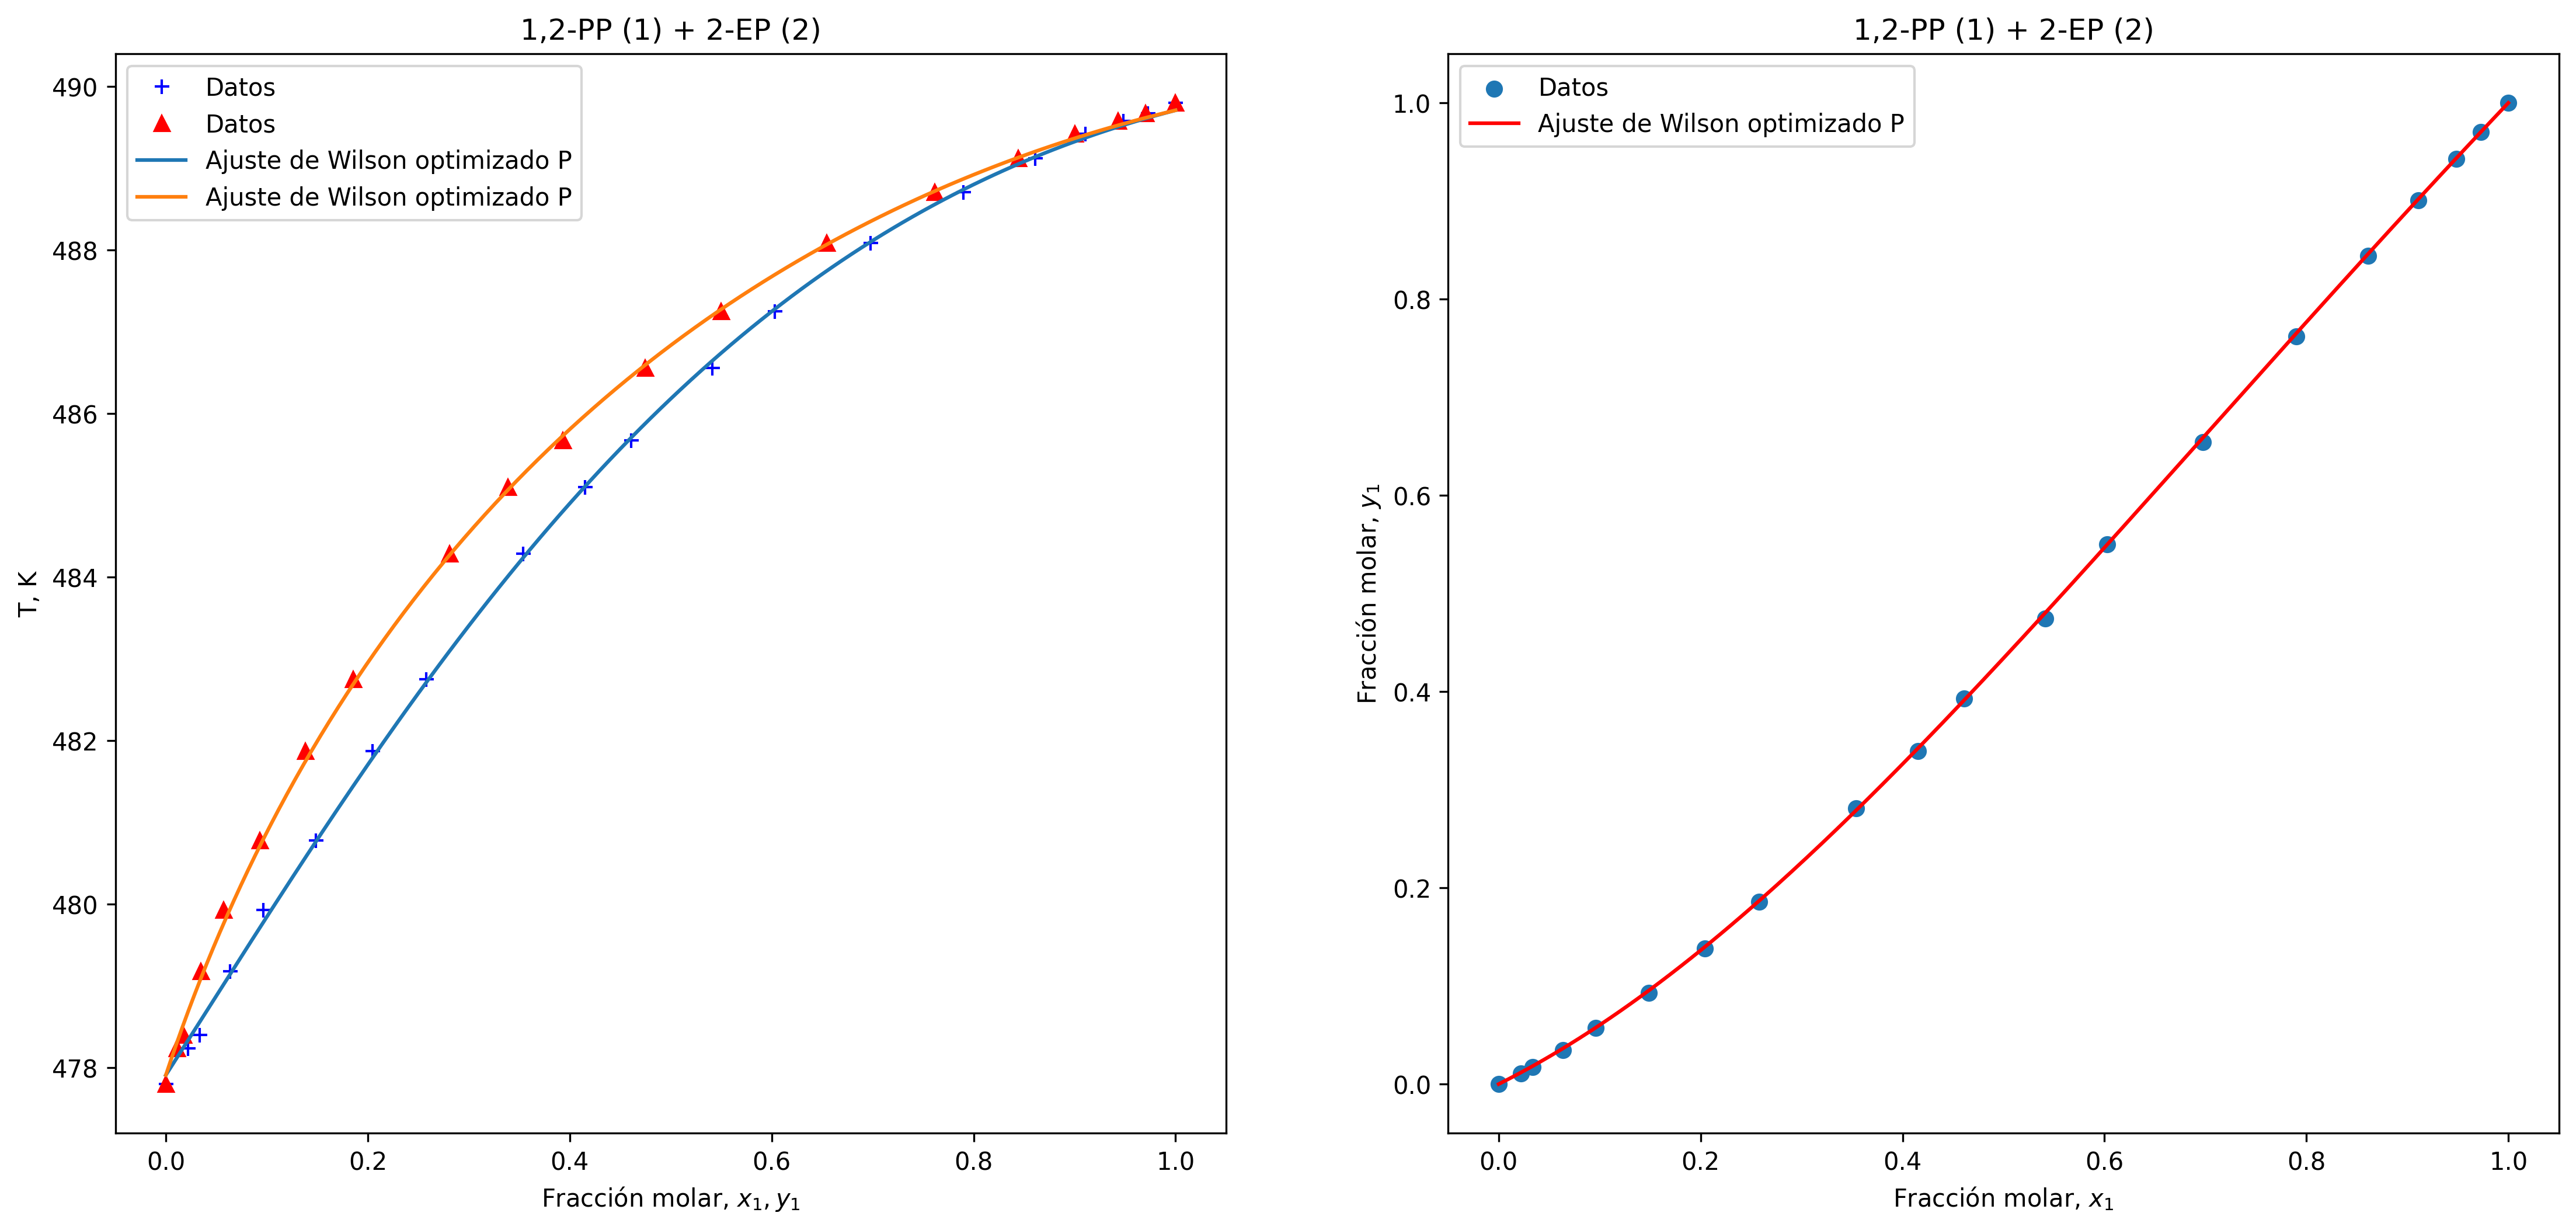

,Datos,D,J,D-J
0,Experimentales,11.351616,3.766396,7.58522
1,Calculados,1.184444,3.703396,7.58522


<Figure size 1920x1440 with 0 Axes>

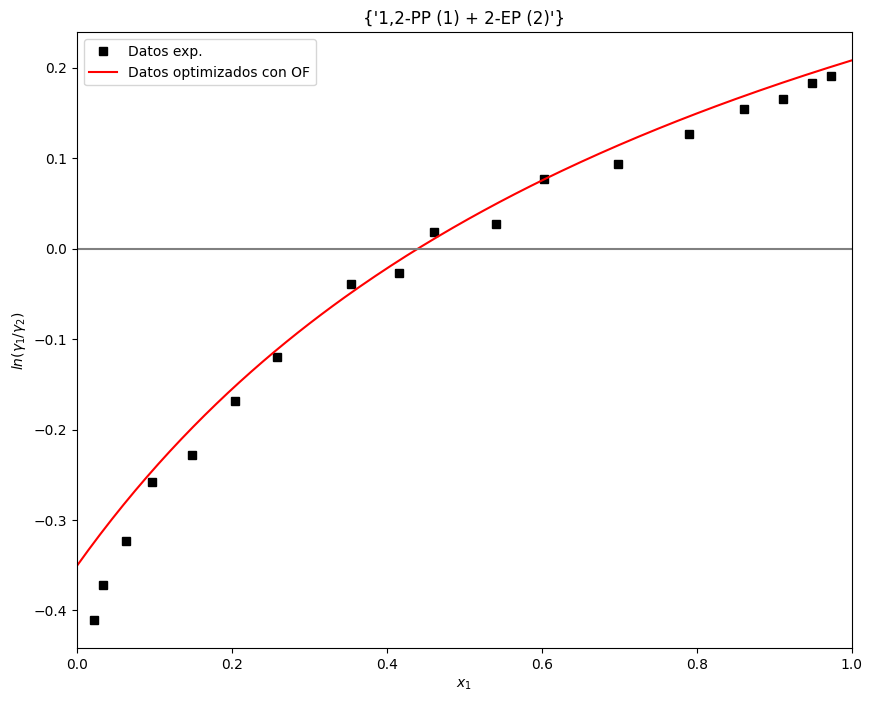

Comprobación de los parámetros de Antoine con las temp. de saturación de los comp. puros:
Psat.  2-Phenyl-1-propanol : 100997 Pa
Psat.  2‑Ethylphenol: 101044 Pa
Resultado de la minimización de la OF:
   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.35604313827701467
        x: [-3.554e+02 -5.905e+02]
      nit: 10
      jac: [ 6.503e-05 -1.333e-04]
 hess_inv: [[ 2.101e+03  9.962e+02]
            [ 9.962e+02  4.723e+02]]
     nfev: 293
     njev: 94

Parámetros Wilson optimizados: [-355.43847929 -590.52099065]


,g1_opt,g2_opt,y1_opt
0,0.6470,1.0000,0.0000
1,0.6587,0.9999,0.0050
2,0.6724,0.9994,0.0114
3,0.7003,0.9975,0.0263
4,0.7300,0.9939,0.0453
5,0.7876,0.9817,0.0946
6,0.8440,0.9621,0.1661
7,0.8924,0.9367,0.2583
8,0.9203,0.9167,0.3334
9,0.9404,0.8986,0.4040


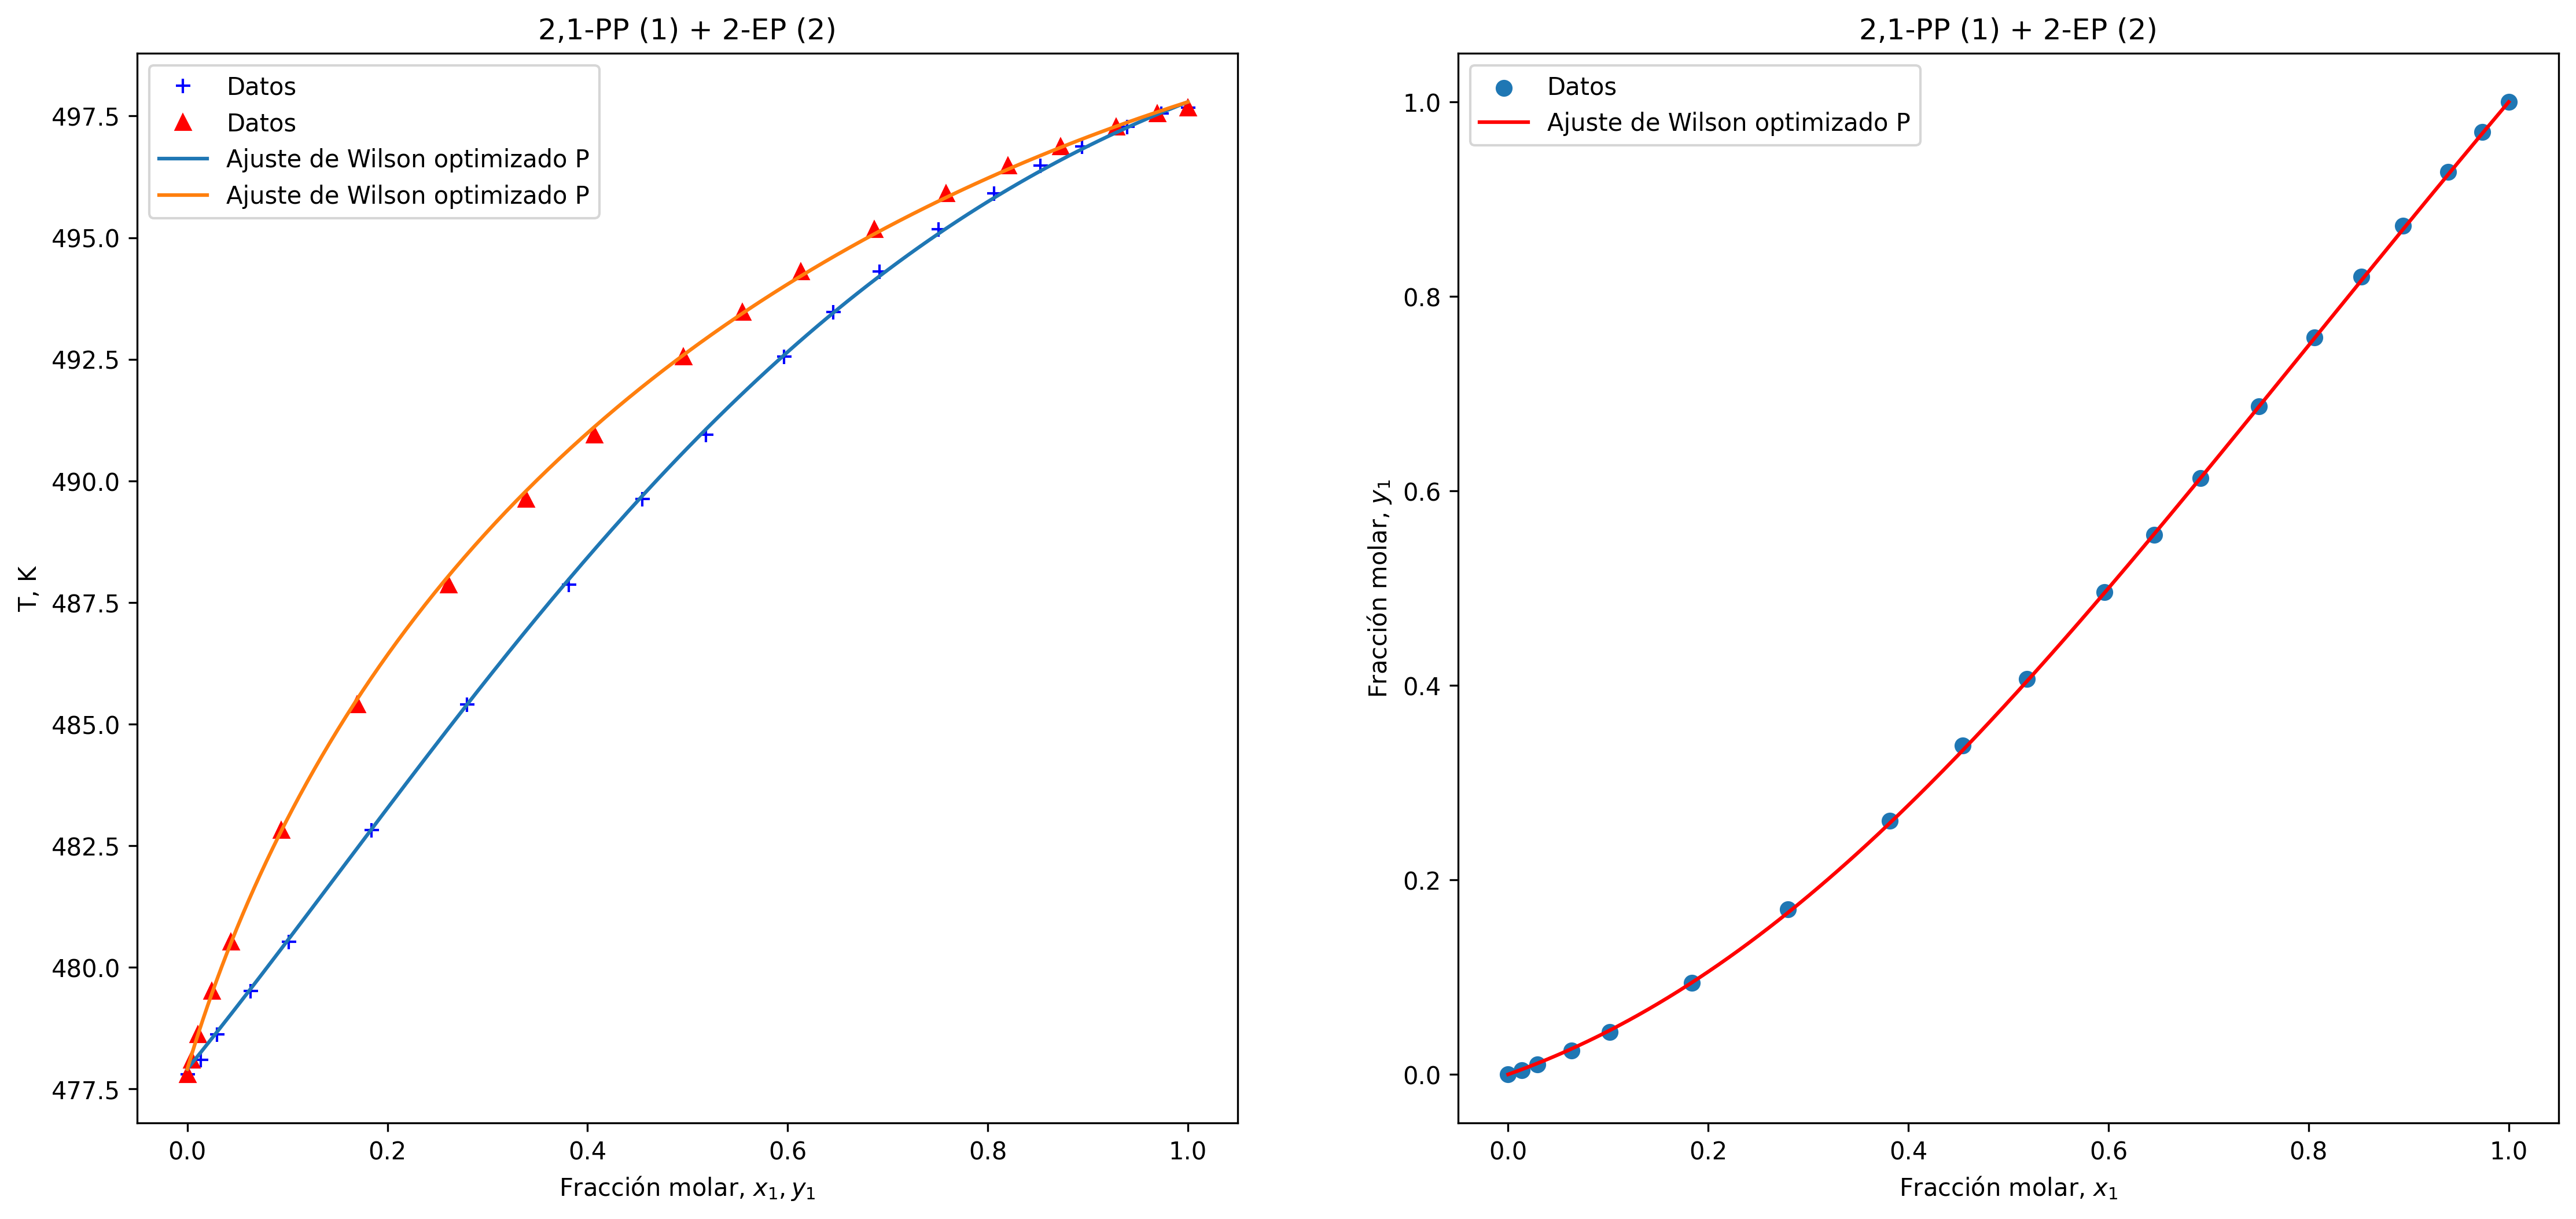

,Datos,D,J,D-J
0,Experimentales,0.260139,6.236525,-5.976385
1,Calculados,1.382991,6.238956,-5.976385


<Figure size 1920x1440 with 0 Axes>

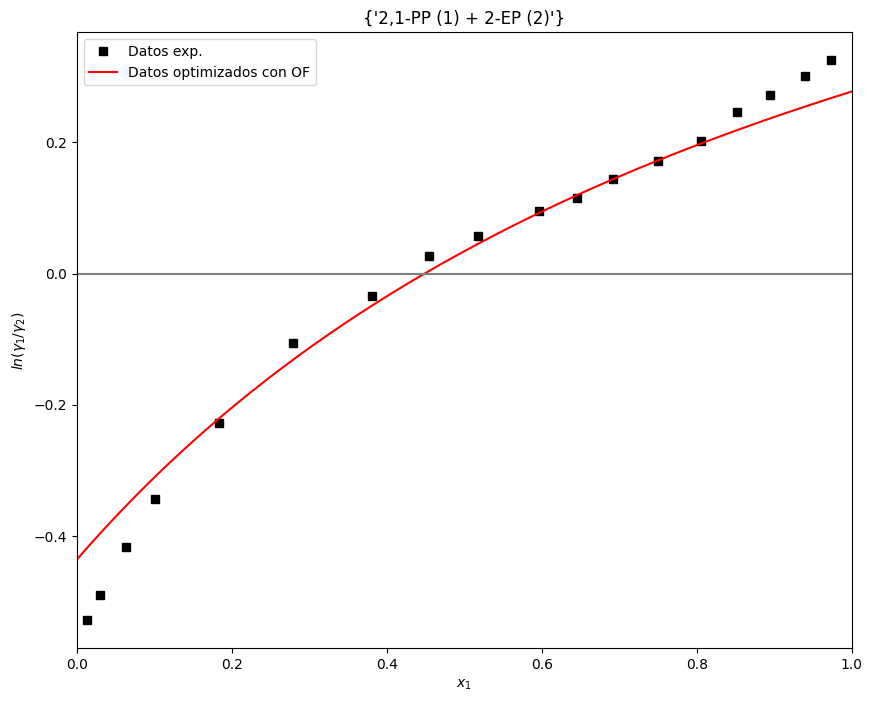

<Figure size 1920x1440 with 0 Axes>

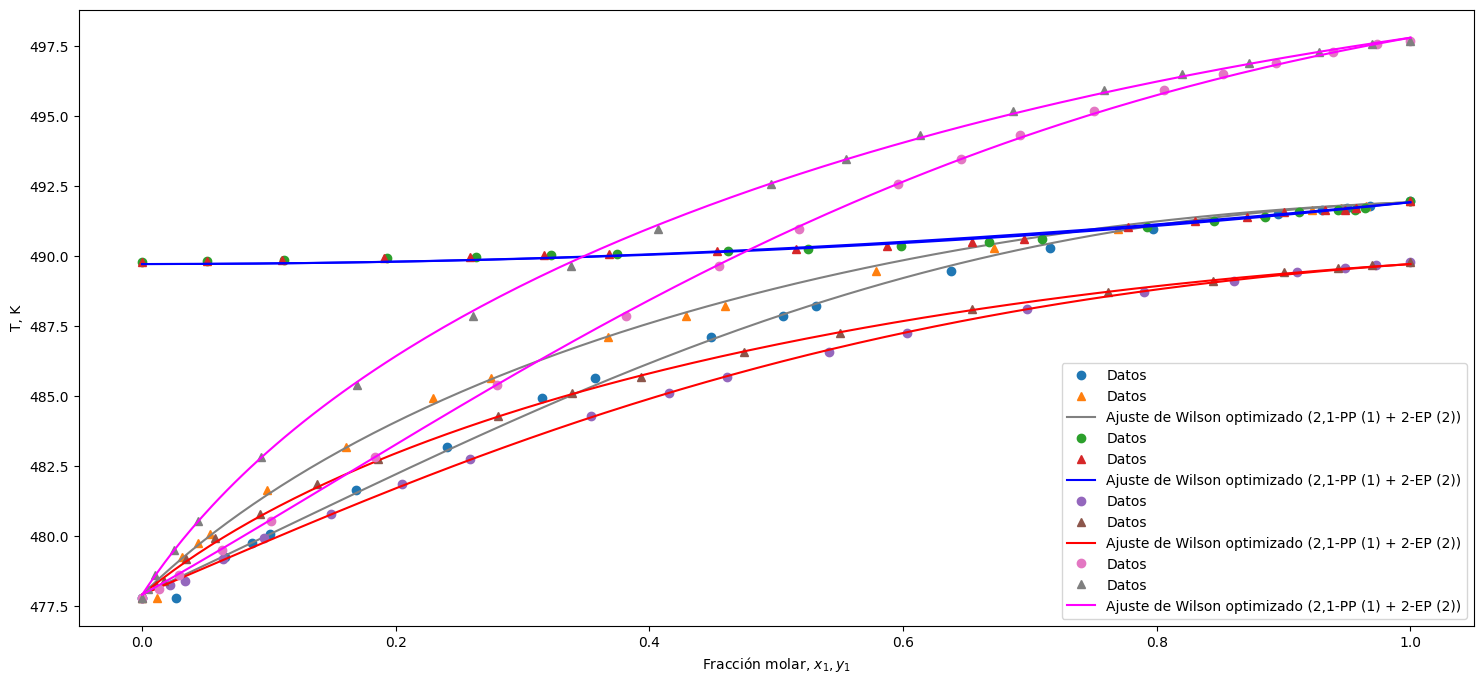

,Mezcla,$\Lambda_{12}$,$\Lambda_{21}$
0,2-PE (1) + 2-EP (2),-535.269759,-659.656568
1,"2-PE (1) + 1,2-PP (2)",136.956363,133.569098
2,"1,2-PP (1) + 2-EP (2)",1763.981515,-1776.557274
3,"2,1-PP (1) + 2-EP (2)",-355.438479,-590.520991


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize
from scipy.stats import tstd
"""
Created on Thu Dec  7 08:19:08 2023

# Cálculo del equilibrio líquido-vapor de una mezcla binaria
# Fase vapor: mezcla de gases ideales
# Fase líquida: disolución real
# Ecuación de Antoine para las presiones de vapor
# Ecuaciones de Wilson para los coeficientes de actividad

@author: german
"""
# Datos experimentales:
P = 101325  # Pa
R = 8.31446261815324
# Parámetros de Antoine para cada componente en cada mezcla
An1 = np.array([58.17  , -8985.10  , 0, 0, -5.7034  , 4.6087e-18, 6])      #parametros de Antoine extendido en ln y Kpa 
An2 = np.array([154.28, -13145.00, 0, 0, -20.1810, 1.0283e-5  , 2])       #parametros de Antoine extendido en ln y Kpa 
An3 = np.array([133.44, -13446.00, 0, 0, -16.6590, 6.6391e-6  , 2])        #parametros de Antoine extendido en ln y Kpa 
An4 = np.array([133.75, -11577.65, 0, 0, -17.5651, 1.3782e-5  , 2])          #parametros de Antoine extendido en ln y Kpa 

# Datos para las cuatro mezclas:
mezclas = [
    {'nombre': '2-PE (1) + 2-EP (2)',
     'comp1' : '2‑Phenylethanol' ,
     'comp2' : ' 2‑Ethylphenol' ,
     'T_exp': np.array([477.80, 477.80, 479.27, 479.77, 480.08, 481.66,483.18, 484.93, 485.63, 487.09, 487.85, 488.22, 489.45, 490.27, 490.95, 491.50, 491.65,491.70 ,491.78 , 491.95]),
     'x': np.array([0,  0.0269,0.0650, 0.0865,  0.1004, 0.1688, 0.2407, 0.3151,  0.3573,  0.4488, 0.5054, 0.5317, 0.6381,  0.7156, 0.7969, 0.8958,  0.9303,0.9503, 0.9679, 1.0000]),
     'y': np.array([0, 0.0115,0.0316, 0.0437,  0.0531,  0.0988, 0.1609, 0.2292,0.2754, 0.3676, 0.4285, 0.4593, 0.5784, 0.6718, 0.7692, 0.8842, 0.9228, 0.9452 ,  0.9648, 1]),
     'An1': An1,
     'An2': An2,
     'TC1': 698.78	,
     'TC2':703.00 ,
     'PC2':4409.10*1000,              #cambio Kpa a pa datos chemeo
     'PC1': 3990.00*1000 ,            #cambio Kpa a pa datos chemeo
     'VC1': 0.395/1000	 ,             #cambio m^3/Kmol a m^3/mol datos chemeo
     'VC2':  0.342/1000	,              #cambio m^3/Kmol a m^3/mol datos chemeo
     'ZC1': (3990.00*1000*0.395/1000)/R/698.78,            
     'ZC2':  (4409.10*1000*0.342/1000)/R/703.00},    #ZC=PC*VC / TC*R bug en el diccionario al ejecutarlo directamente 
   
     {'nombre': '2-PE (1) + 1,2-PP (2)',
     'comp1' : '2‑Phenylethanol' ,
     'comp2' : ' 1‑Phenyl-2-propanol ' ,
     'T_exp': np.array([ 489.80, 489.83, 489.87, 489.93, 489.96, 490.02,490.07, 490.16, 490.25, 490.37,490.51, 490.60, 491.05, 491.24, 491.38,  491.56,  491.65, 491.65,491.70 , 491.95 ]),
     'x': np.array([0, 0.0511,  0.1116,0.1931, 0.2635, 0.3227, 0.3747,  0.4619,  0.5247,  0.5982,  0.6680,  0.7098, 0.7926,   0.8455, 0.8850, 0.9124,   0.9427,0.9566,0.9640, 1.0000]),
     'y': np.array([0,  0.0509,  0.1103,0.1905, 0.2588,  0.3166, 0.3681, 0.4534, 0.5154,0.5874, 0.6546, 0.6957,0.7773, 0.8301, 0.8710, 0.9007,  0.9330, 0.9488,  0.9573, 1]),
     'An1': An1,
     'An2':An4,
     'TC1': 698.78	,
     'TC2':722.83	 ,
     'PC2':3668.65*1000 ,             #cambio Kpa a pa datos chemeo
     'PC1':3990.00*1000 ,             #cambio Kpa a pa datos chemeo
     'VC1':0.395/1000	  ,            #cambio m^3/Kmol a m^3/mol datos chemeo
     'VC2': 0.445/1000 ,                #cambio m^3/Kmol a m^3/mol datos chemeo
     'ZC1': (3990.00*1000*0.395/1000)/R/ 698.78,
     'ZC2':  (3668.65*1000*0.445/1000)/R/722.83},
    

     {'nombre': '1,2-PP (1) + 2-EP (2)',
     'comp2' : ' 2‑Ethylphenol' ,
     'comp1' : ' 1‑Phenyl-2-propanol ' ,
     'T_exp': np.array([477.80, 478.24,478.40, 479.18,  479.93, 480.78, 481.87, 482.75,484.29,  485.10, 485.67, 486.56, 487.25, 488.09, 488.71, 489.12, 489.42,489.58 , 489.67 , 489.80]),
      'x': np.array([0,   0.0220,0.0335, 0.0638,  0.0964, 0.1488, 0.2045,0.2581, 0.3539,  0.4152,0.4611, 0.5414, 0.6029,  0.6977,0.7901, 0.8610,  0.9109, 0.9483,  0.9728, 1.0000]),
     'y': np.array([0, 0.0108, 0.0172, 0.0349,  0.0571,   0.0929,0.1380, 0.1857,0.2808, 0.3391,0.3930, 0.4745, 0.5501, 0.6544, 0.7618, 0.8440, 0.9004,  0.9429,  0.9701, 1]),
     'An1': An4,
     'An2': An2,
     'TC1':722.83	 ,
     'TC2':703.00 ,
     'PC2':4409.10*1000,             #cambio Kpa a pa datos chemeo
     'PC1': 3668.65*1000 ,           #cambio Kpa a pa datos chemeo
     'VC1': 0.445/1000	 ,            #cambio m^3/Kmol a m^3/mol datos chemeo
     'VC2':0.342	/1000 ,               #cambio m^3/Kmol a m^3/mol datos chemeo
     'ZC1': (3668.65*1000*0.445/1000)/R/722.83,
     'ZC2':  (4409.10*1000*0.342	/1000 )/R/703.00},

     {'nombre': '2,1-PP (1) + 2-EP (2)',
     'comp2' : ' 2‑Ethylphenol' ,
     'comp1' : ' 2-Phenyl-1-propanol ' ,
     'T_exp': np.array([477.80, 478.10, 478.62, 479.51, 480.53, 482.82,485.41, 487.87, 489.63, 490.95,  492.56, 493.47, 494.31, 495.17,495.91, 496.48,496.87,497.28 ,497.55 ,  497.67]),
     'x': np.array([0,  0.0134, 0.0294,0.0633, 0.1015, 0.1838, 0.2794, 0.3813,  0.4545,0.5182, 0.5961, 0.6456,0.6919,0.7506, 0.8060,0.8525,  0.8941,0.9392, 0.9736, 1.0000]),
     'y': np.array([0, 0.0045, 0.0104, 0.0247,0.0438,  0.0940, 0.1697, 0.2610, 0.3384,  0.4067, 0.4959,0.5547, 0.6132,  0.6868,0.7581,  0.8203,  0.8727,  0.9283 ,  0.9694, 1]),
     'An1': An3, 
     'An2': An2,
     'TC1': 722.83,
     'TC2':703.00 ,
     'PC2':4409.10*1000,          #cambio Kpa a pa datos chemeo
     'PC1': 4409.10*1000,         #cambio Kpa a pa datos chemeo
     'VC1':0.445/1000	  ,        #cambio m^3/Kmol a m^3/mol datos chemeo
     'VC2':0.342/1000  ,            #cambio m^3/Kmol a m^3/mol datos chemeo
     'ZC1': (4409.10*1000*0.445/1000)/R/ 722.83,
     'ZC2':  (4409.10*1000*0.342/1000)/R/703.00}, 
  
]

#creamos un diccionario para almacenar todas las variables que obtendremos con wilson 
resultados_df = pd.DataFrame(columns=['Nombre', 'g1_opt', 'g2_opt', 'y1_opt'])
all_nombres = []
all_g1_opt = []
all_g2_opt = []
all_y1_opt = []
graficos_datos = []
parametrosW_iteracion = []
gammawilson = []
alpha12W = []
Dwilson = []
#obtener los parametros que se va a necesitar de cada mezcla para el calculo de wilson 
for mezcla in mezclas:
    comp1 = mezcla['comp1']
    comp2 =mezcla['comp2']
    nombre = mezcla['nombre']
    T_exp = mezcla['T_exp']
    x1 = mezcla['x']
    y1 = mezcla['y']
    An1 = mezcla['An1']
    An2 = mezcla['An2']
    TC1 = mezcla['TC1']
    TC2 = mezcla['TC2']
    PC1 = mezcla['PC1']
    PC2 = mezcla['PC2']
    VC1 = mezcla['VC1']
    VC2 = mezcla['VC2']
    ZC1 = mezcla['ZC1']
    ZC2 = mezcla['ZC2']
    
    #calculo del  Volumen molar del líquido a partir del vapor
    Vsat = lambda T, TC, PC, ZC,: R*TC/PC*ZC**(1+(1-T/TC)**(2/7))

    v1 = lambda T: Vsat(T, TC1, PC1, ZC1)
    v2 = lambda T: Vsat(T, TC2, PC2, ZC2)
   
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import fsolve, minimize
    
    
    # Se define una función para calcular la presión de saturación con la ecuación de Antoine:
    Psat = lambda An, T: (np.exp(An[0] + (An[1] / (T + An[2])) + (An[3]*T) + (An[4]* np.log(T)) + (An[5] * (T**An[-1]))))*1000
    # Comprobación de ecuación de Antoine
    print('Comprobación de los parámetros de Antoine con las temp. de saturación de los comp. puros:')
    print('Psat. '+comp1+': %.0f Pa'%Psat(An1,T_exp[-1]))
    print('Psat. '+comp2+': %.0f Pa'%Psat(An2,T_exp[0]))

    # Definir una función objetivo y minimizarla
    
    T_cal = np.zeros(len(T_exp))
    def Twilson(l):
       
        for j in range(len(x1)):
            l1 = l[0]
            l2 = l[1]
            L12 = lambda T: v2(T)/v1(T)*np.exp(-l1/R/T)
            L21 = lambda T: v1(T)/v2(T)*np.exp(-l2/R/T)
            g1 = lambda T: np.exp(-np.log(x1[j]+L12(T)*(1-x1[j]))+(1-x1[j])*(L12(T)/(x1[j]+L12(T)*(1-x1[j]))-L21(T)/(1-x1[j]+L21(T)*x1[j])))
            g2 = lambda T: np.exp(-np.log(1-x1[j]+L21(T)*x1[j])+x1[j]*(-L12(T)/(x1[j]+L12(T)*(1-x1[j]))+L21(T)/(1-x1[j]+L21(T)*x1[j])))
            calculo_T = lambda T: P - g1(T)*x1[j]*Psat(An1, T) - g2(T)*(1-x1[j])*Psat(An2, T)
            T_cal[j] = fsolve(calculo_T, np.mean(T_exp))[0]
        return T_cal
      
    # Calcula la presión a partir del modelo para los coef. de actividad y las temperaturas calculadas con el modelo
    def Pcal(l):
        L12 = v2(T_exp)/v1(T_exp)*np.exp(-l[0]/R/T_exp)
        L21 = v1(T_exp)/v2(T_exp)*np.exp(-l[1]/R/T_exp)
        g1 = np.exp(-np.log(x1+L12*(1-x1))+(1-x1)*(L12/(x1+L12*(1-x1))-L21/(1-x1+L21*x1)))
        g2 = np.exp(-np.log(1-x1+L21*x1)+x1*(-L12/(x1+L12*(1-x1))+L21/(1-x1+L21*x1)))
        return x1*g1*Psat(An1,T_exp)+(1-x1)*g2*(1-x1)*Psat(An2,T_exp)

    def xcal(l):                                                                                                
         for j in range(len(x1)):
             l1 = l[0]
             l2 = l[1]
             L12 = lambda T: v2(T)/v1(T)*np.exp(-l1/R/T)
             L21 = lambda T: v1(T)/v2(T)*np.exp(-l2/R/T)
             g1 = lambda T: np.exp(-np.log(x1[j]+L12(T)*(1-x1[j]))+(1-x1[j])*(L12(T)/(x1[j]+L12(T)*(1-x1[j]))-L21(T)/(1-x1[j]+L21(T)*x1[j])))
             g2 = lambda T: np.exp(-np.log(1-x1[j]+L21(T)*x1[j])+x1[j]*(-L12(T)/(x1[j]+L12(T)*(1-x1[j]))+L21(T)/(1-x1[j]+L21(T)*x1[j])))
             return y1*P/Psat(An1,T_exp)/g1(T_exp)
    def ycal(l):
        for j in range(len(x1)):
            l1 = l[0]
            l2 = l[1]
            L12 = v2(T_exp)/v1(T_exp)*np.exp(-l[0]/R/T_exp)
            L21 = v1(T_exp)/v2(T_exp)*np.exp(-l[1]/R/T_exp)
            g1 = lambda T: np.exp(-np.log(x1[j] + L12(T) * (1 - x1[j])) + (1 - x1[j]) * (L12(T) / (x1[j] + L12(T) * (1 - x1[j])) - L21(T) / (1 - x1[j] + L21(T) * x1[j])))
            g2 = lambda T: np.exp(-np.log(1-x1[j]+L21(T)*x1[j])+x1[j]*(-L12(T)/(x1[j]+L12(T)*(1-x1[j]))+L21(T)/(1-x1[j]+L21(T)*x1[j])))
            return x1 * g1(T_exp) * Psat(An1, T_exp) / P
    
    #variable objetivo
    #OF = lambda A: sum((((T_exp - Twilson(A)) / tstd(T_exp - Twilson(A)))**2)  +((y1 - ycal(A)) / tstd(y1 - ycal(A)))**2+ (((x1 - xcal(A)) / tstd(x1 - xcal(A)))**2)   )           


    OF = lambda A: sum((T_exp-Twilson(A))**2)**0.5
    
    l_cal=minimize(OF, [100,100])
    
    print('Resultado de la minimización de la OF:\n',l_cal)
    print('\nParámetros Wilson optimizados:',l_cal.x)
    
    
    parametrosW_iteracion.append({
        'Mezcla': nombre,
        '$\\Lambda_{12}$': l_cal.x[0],
        '$\\Lambda_{21}$': l_cal.x[1]
    })
    ## Gráficos de datos y ajuste
    # Define la función de Wilson para calcular T y coef. de actividad
    def Wilson_T(x1, l1, l2):
        T = np.zeros(len(x1))
        g1c = np.zeros(len(x1))
        g2c = np.zeros(len(x1))
        y1c = np.zeros(len(x1))
        
        for j in range(len(x1)):
            L12 = lambda T: v2(T)/v1(T)*np.exp(-l1/R/T)
            L21 = lambda T: v1(T)/v2(T)*np.exp(-l2/R/T)
            g1 = lambda T: np.exp(-np.log(x1[j]+L12(T)*(1-x1[j]))+(1-x1[j])*(L12(T)/(x1[j]+L12(T)*(1-x1[j]))-L21(T)/(1-x1[j]+L21(T)*x1[j])))
            g2 = lambda T: np.exp(-np.log(1-x1[j]+L21(T)*x1[j])+x1[j]*(-L12(T)/(x1[j]+L12(T)*(1-x1[j]))+L21(T)/(1-x1[j]+L21(T)*x1[j])))
            calculo_T = lambda T: P - g1(T)*x1[j]*Psat(An1, T) - g2(T)*(1-x1[j])*Psat(An2, T)
            T[j] = fsolve(calculo_T, np.mean(T_exp), xtol=1e-8)[0]
            g1c[j] = g1(T[j])
            g2c[j] = g2(T[j])
            y1c[j] = x1[j]*g1(T[j])*Psat(An1,T[j])/P
        
        return T, g1c, g2c, y1c

    
   
    [T_opt2, g1_opt2, g2_opt2, y1_opt2] = Wilson_T(x1, *l_cal.x)
    # Almacenar resultados en las listas
    resultados_iteracion = pd.DataFrame({
        'g1_opt': list(map(list, zip(g1_opt2))),
        'g2_opt': list(map(list, zip(g2_opt2))),
        'y1_opt': list(map(list, zip(y1_opt2)))
    })
    resultados_iteracion = resultados_iteracion.apply(lambda x: x.map(lambda y: '{:.4f}'.format(y[0])))
    display(resultados_iteracion)   

    #graficamos datos 
    x1_graf = np.linspace(0,1,201)
    [T_opt, g1_opt, g2_opt, y1_opt] = Wilson_T(x1_graf, *l_cal.x)
    def alpha12(y1_opt, x1_graf):
            if (x1_graf * (1 - y1_opt) == 0).any():
                epsilon = 1e-7  # pequeña constante para evitar valores infinitos 
                return (y1_opt * (1 - x1_graf)) / (x1_graf * (1 - y1_opt) + epsilon)
            else:
                return 0 # 
    alpha12W = list(alpha12(y1_opt, x1_graf))
    alpha12W.append({
    'alpha12w': alpha12W,
    })            
    gammawilson.append({
    'gammawilson1': g1_opt,
    'gammawilson2': g2_opt
    })
    gammawilson.append(gammawilson)
    fig, ax = plt.subplots(1, 2, figsize = (18,8), dpi=300)
    ax[0].plot(x1, T_exp, '+b', y1, T_exp, '^r', label='Datos')
    ax[0].plot(x1_graf, T_opt, y1_opt, T_opt, label='Ajuste de Wilson optimizado P')
    ax[0].set_xlabel('Fracción molar, $x_1, y_1$')
    ax[0].set_ylabel('T, K')
    ax[0].legend()
    ax[0].set_title(nombre)
    # Almacenar los datos en la lista
    datos_grafico = {
        'x1': x1,
        'x1_graf': x1_graf,
        'T_exp': T_exp,
        'y1': y1,
        'T_opt': T_opt,
        'y1_opt': y1_opt
    }
    graficos_datos.append(datos_grafico)
    
    # Gráfico de los datos y el ajuste
    ax[1].scatter(x1, y1, label='Datos')
    ax[1].plot(x1_graf, y1_opt, label='Ajuste de Wilson optimizado P', color='red')
    ax[1].set_xlabel('Fracción molar, $x_1$')
    ax[1].set_ylabel('Fracción molar, $y_1$')
    ax[1].legend()
    ax[1].set_title(nombre)
    plt.show()
    
    ## Test de consistencia termodinámica
    # Cálculo  de coef. de actividad eliminando los comp. puros
    g1_exp = y1[1:-1]*P/x1[1:-1]/Psat(An1,T_exp[1:-1])
    g2_exp = (1-y1[1:-1])*P/(1-x1[1:-1])/Psat(An2,T_exp[1:-1])

    # Definimos una función para calcular la consistencia termodinámica
    def consistencia(x1,g1,g2,T):
        AmenosB = np.trapz(np.log(g1/g2),x1)
        AmasB = np.trapz(abs(np.log(g1/g2)),x1)
        D = abs(AmenosB)/AmasB*100
        J = 150*(max(T)-min(T))/min(T_opt)
        return D, J
    
    D, J = consistencia(x1[1:-1], g1_exp, g2_exp, T_exp)
    f = D-J
    df_exp = pd.DataFrame({
    'Datos': 'Experimentales',
    'D': [D],
    'J': [J] ,
    'D-J': [f]
     })
    D, J = consistencia(x1_graf, g1_opt, g2_opt, T_opt)
    df_op = pd.DataFrame({
    'Datos': 'Calculados',
    'D': [D],
    'J': [J] ,
    'D-J': [f]
     })
    df_combi = pd.concat([df_exp, df_op], ignore_index=True)
    display(df_combi)
    plt.figure(dpi=300)  # Ajustar la resolución de la figura
    plt.figure(figsize=(10, 8))
    plt.plot(x1[1:-1], np.log(g1_exp/g2_exp), 's', color='black', label='Datos exp.')
    plt.plot(x1_graf, np.log(g1_opt/g2_opt), '-', color='red', label='Datos optimizados con OF')
    plt.plot([0,1],[0,0], c ='grey')
    plt.xlim(0,1)
    plt.xlabel('$x_1$')
    plt.ylabel('$ln (\\gamma_1/\\gamma_2)$')
    plt.legend()
    plt.title({nombre})
    plt.show()

# Graficar todos los datos almacenados en la lista
print('')
plt.figure(dpi=300)  # Ajustar la resolución de la figura
plt.figure(figsize=(18, 8))
colores = ['gray', 'blue', 'red', 'fuchsia']
for datos_grafico, color in zip(graficos_datos, colores):
    plt.plot(datos_grafico['x1'], datos_grafico['T_exp'], 'o', label='Datos')
    plt.plot(datos_grafico['y1'], datos_grafico['T_exp'], '^', label='Datos')
    plt.plot(datos_grafico['x1_graf'], datos_grafico['T_opt'], color=color, label=f'Ajuste de Wilson optimizado ({nombre})')
    plt.plot(datos_grafico['y1_opt'], datos_grafico['T_opt'], color=color)

plt.xlabel('Fracción molar, $x_1, y_1$')
plt.ylabel('T, K')
plt.legend()
plt.show()
print('')
parametrosW_df = pd.DataFrame(parametrosW_iteracion)
display(parametrosW_df)

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Datos dados
Te = np.array([354.19, 352.15, 351.89, 351.02, 349.8, 348.63, 348.38, 348.26, 347.91, 347.88, 347.9])
x1 = np.array([0.0206, 0.1210, 0.1725, 0.2437, 0.3630, 0.5056, 0.5672, 0.6011, 0.7104, 0.7535, 0.8452])
x2 = 1 - x1
y1e = np.array([0.0603, 0.2052, 0.2643, 0.3397, 0.4428, 0.5627, 0.6148, 0.6319, 0.7243, 0.7589, 0.8363])
An1 = [9.35648, 1107.060, -101.048]
An2 = [9.23182, 1236.700, -55.915]
tau12 = 576.6816
tau21 = 1242.1782
alfa = 0.3
G12 = np.exp(-alfa * tau12)
G21 = np.exp(-alfa * tau21)
g1 = np.exp((x2**2) * (tau21 * (G21 / (x1 + x2 * G21))**2 + (G12 * tau12) / ((x2 + x1 * G12)**2)))
g2 = np.exp((x1**2) * (tau12 * (G12 / (x2 + x1 * G12))**2 + (G21 * tau21) / ((x1 + x2 * G21)**2)))

# Número de puntos
nd = len(x1)

# Condiciones iniciales
Tcal = np.zeros_like(x1)
y1s = np.zeros_like(x1)

# Presiones de vapor saturado
def P1sat(T):
    return np.exp(An1[0] - An1[1] / (T + An1[2]))

def P2sat(T):
    return np.exp(An2[0] - An2[1] / (T + An2[2]))

# Presión total
P = 101.3  # kPa

# Iteración para encontrar temperaturas
for i in range(1, nd - 1):
    x1_val = x1[i]

    # Función para encontrar la temperatura
    def calculo_T(T):
        return P - x1_val * g1[i] * P1sat(T) - (1 - x1_val) * g2[i] * P2sat(T)

    # Adivinanza inicial para la temperatura
    Tcal[i] = fsolve(calculo_T, Tcal[i - 1], xtol=1e-8)[0]


    # Cálculo de y1s
    y1s[i] = x1_val * g1[i] * P1sat(Tcal[i]) / P
# Coeficientes de actividad
g = np.vstack([g1, g2])
x_1 = np.concatenate([[0], x1, [1]])
y_1 = np.concatenate([[0], y1s, [1]])

# Representación gráfica
y11 = (x1 * g[0, :] * P1sat(Tcal)) / P
y22 = 1 - y11
fug1 = (P * y11) / (x1 * g[0, :] * P1sat(Tcal))
fug2 = (P * y22) / (x2 * g[1, :] * P2sat(Tcal))

plt.figure(1)
plt.plot(x1, Te, 'o', x1, Tcal, 'b', y1s, Tcal, 'r')
plt.xlabel('x_1, y_1')
plt.ylabel('T/K')
plt.show()
